In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Live_20210128.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
df.drop(columns=df.columns[-10:], axis=1,  inplace=True)
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares
0,1,video,4/22/2018 6:00,529,512,262
1,2,photo,4/21/2018 22:45,150,0,0
2,3,video,4/21/2018 6:17,227,236,57
3,4,photo,4/21/2018 2:29,111,0,0
4,5,photo,4/18/2018 3:22,213,0,0
...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0
7046,7047,photo,9/23/2016 11:19,16,0,0
7047,7048,photo,9/21/2016 23:03,2,0,0
7048,7049,photo,9/20/2016 0:43,351,12,22


In [6]:
df = df.drop(df.columns[[0, 1, 2]], axis=1)
df

,num_reactions,num_comments,num_shares
0,529,512,262
1,150,0,0
2,227,236,57
3,111,0,0
4,213,0,0
...,...,...,...
7045,89,0,0
7046,16,0,0
7047,2,0,0
7048,351,12,22


In [7]:
df.shape

(7050, 3)

In [11]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  7050 non-null   int64
 1   num_comments   7050 non-null   int64
 2   num_shares     7050 non-null   int64
dtypes: int64(3)
memory usage: 165.4 KB


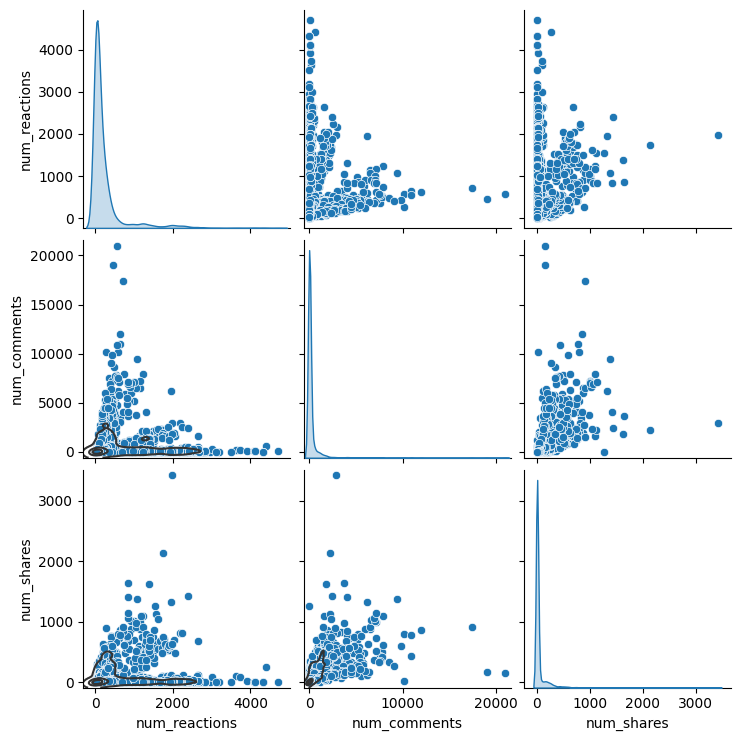

In [13]:
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [14]:
sc = StandardScaler().fit(df)
X = sc.transform(df)
X[0:5]

array([[ 0.64610394,  0.32335035,  1.6868788 ],
       [-0.17319166, -0.25220622, -0.3041444 ],
       [-0.00673846,  0.01308938,  0.12901714],
       [-0.25749912, -0.25220622, -0.3041444 ],
       [-0.03700268, -0.25220622, -0.3041444 ]])